In [45]:
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from sklearn.datasets import make_regression

In [46]:
def get_dataset():
    # Create sample data with sklearn make_regression function
    X, y = make_regression(n_samples=1000, n_features=10, n_informative=7, n_targets=5, random_state=0)

    # Convert the data into Pandas Dataframes for easier maniplution and keeping stored column names
    # Create feature column names
    feature_cols = [
        "feature_01",
        "feature_02",
        "feature_03",
        "feature_04",
        "feature_05",
        "feature_06",
        "feature_07",
        "feature_08",
        "feature_09",
        "feature_10",
    ]

    df_features = pd.DataFrame(data=X, columns=feature_cols)

    # Create lable column names and dataframe
    label_cols = ["labels_01", "labels_02", "labels_03", "labels_04", "labels_05"]

    df_labels = pd.DataFrame(data=y, columns=label_cols)

    return df_features, df_labels

In [47]:
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(32, input_dim=n_inputs, kernel_initializer="he_uniform", activation="relu"))
    model.add(Dense(n_outputs, kernel_initializer="he_uniform"))
    model.compile(loss="mae", optimizer="adam")
    return model

In [48]:
# Create the datasets
X, y = get_dataset()

# Get the number of inputs and outputs from the dataset
n_inputs, n_outputs = X.shape[1], y.shape[1]

In [49]:
model = get_model(n_inputs, n_outputs)

/mnt/c/Users/hieunt/python/Lab/model-poshap/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.fit(X, y, verbose=0, epochs=100)

In [51]:
model.evaluate(x=X, y=y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 15.0205


14.94747543334961

In [52]:
model.predict(X.iloc[0:1, :])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[  18.913229,  -64.94425 ,  -67.56359 ,  -80.45272 , -106.817726]],
      dtype=float32)

In [53]:
import shap

# print the JS visualization code to the notebook
shap.initjs()

In [70]:
explainer = shap.KernelExplainer(model=model.predict, data=X.head(50), link="identity")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [75]:
# Set the index of the specific example to explain
X_idx = 0

shap_value_single = explainer.shap_values(X=X.iloc[X_idx : X_idx + 1, :], nsamples=100)

  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step


In [56]:
X.iloc[X_idx : X_idx + 1, :]

,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10
0,-0.093555,0.417854,-1.655827,-2.048833,-0.258209,-0.989744,-0.154596,-0.338294,1.503827,-0.514878


In [57]:
import ipywidgets as widgets
# Create the list of all labels for the drop down list
list_of_labels = y.columns.to_list()

# Create a list of tuples so that the index of the label is what is returned
tuple_of_labels = list(zip(list_of_labels, range(len(list_of_labels))))

# Create a widget for the labels and then display the widget
current_label = widgets.Dropdown(options=tuple_of_labels, value=0, description="Select Label:")

# Display the dropdown list (Note: access index value with 'current_label.value')
current_label

Dropdown(description='Select Label:', options=(('labels_01', 0), ('labels_02', 1), ('labels_03', 2), ('labels_…

In [73]:
# print the JS visualization code to the notebook
shap.initjs()

print(f"Current label Shown: {list_of_labels[current_label.value]}")

shap.force_plot(
    base_value=explainer.expected_value[current_label.value],
    shap_values=shap_value_single[0][:, current_label.value],
    features=X.iloc[X_idx : X_idx + 1, :],
)

Current label Shown: labels_04


In [68]:
shap_value_single[0][:, 0]

array([ -0.26418806,  21.27051543,   2.37998327, -10.83602044,
        -0.98319388, -74.79838056,   0.        , -36.7295718 ,
       123.72583697,  -7.32323132])

In [76]:
shape_values = explainer.shap_values(X=X.iloc[0:50 , :], nsamples=100)

  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [99]:
shape_values[:, :,0]

array([[ 5.12803491e-01,  2.13596331e+01,  3.07812580e+00,
        -1.08239484e+01, -1.07172620e+00, -7.54595380e+01,
        -1.05166220e+00, -3.69244833e+01,  1.24599218e+02,
        -7.77667270e+00],
       [ 1.05674093e+00,  4.16131743e+01,  1.39646048e+00,
        -1.28605993e+00,  6.17165577e+00,  7.89874797e+01,
        -1.23336798e+00, -1.31737047e+02, -7.91485298e+01,
        -2.70074785e+01],
       [ 0.00000000e+00,  2.13959971e+00,  6.18012204e-01,
         5.37205599e+00,  1.36849316e+01,  5.20804896e+01,
        -2.34445139e+00,  1.64676208e+02, -1.47395928e+01,
         1.16138235e+01],
       [-2.39234738e-01,  4.65766633e+01,  0.00000000e+00,
         2.47388880e-01,  1.28839473e+01, -1.95600538e+01,
         6.20538515e-01, -1.21920712e+02, -7.25623800e+01,
        -6.98008539e+00],
       [ 4.55142683e-01, -1.48246797e+01,  4.18197772e-01,
        -5.07122906e+00, -9.50244600e+00,  1.10242162e+02,
        -1.11185999e+00,  2.73184768e+01,  7.97961723e+01,
         7.

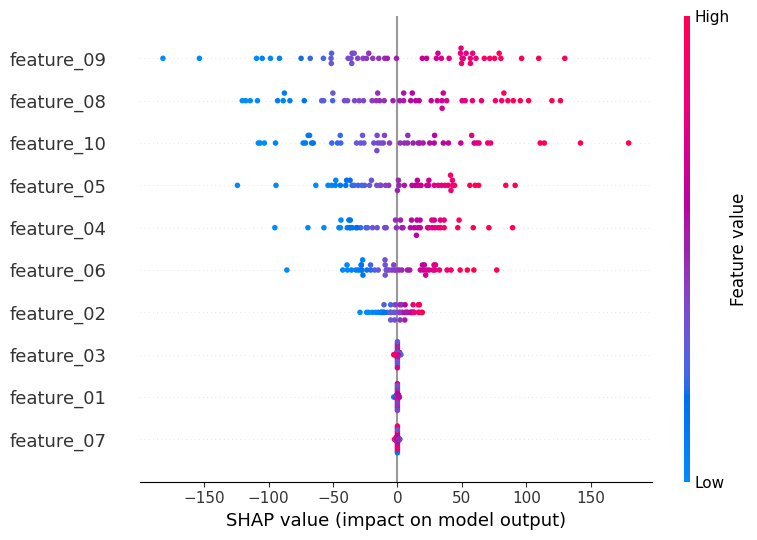

In [100]:
shap.initjs()

shap.summary_plot(shap_values=shape_values[:, :, current_label.value], features=X.iloc[0:50, :])